<img src="data6.png" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Lab 7 – Data Visualization

## Data 6, Fall 2024

In [1]:
# Run this cell to load all required Python libraries
import numpy as np
from datascience import *

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [3]:
salary = Table.read_table("Salary_data.csv")
clean_salary = Table.read_table("clean_data.csv")
clean_salary

Age,Gender,Education Level,Job Title,Years of Experience,Salary
32,Male,Bachelor's Degree,Software Engineer,5,90000
28,Female,Master's Degree,Data Analyst,3,65000
45,Male,PhD,Senior Manager,15,150000
36,Female,Bachelor's Degree,Sales Associate,7,60000
52,Male,Master's Degree,Director,20,200000
29,Male,Bachelor's Degree,Marketing Analyst,2,55000
42,Female,Master's Degree,Product Manager,12,120000
31,Male,Bachelor's Degree,Sales Manager,4,80000
26,Female,Bachelor's Degree,Marketing Coordinator,1,45000
38,Male,PhD,Senior Scientist,10,110000


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Data Visualization Methods for Multiple Variables

<div class="alert alert-warning">
In last week's lab, we saw how we could use bar charts and histograms to visualize indvidual (and occasionally multiple) variables at once, in order to get a better idea of how our dataset is broken down and distributed across different features. In this section, we'll dive more into how we can visualize the relationships between variables and how one variable may affect another. For this part, we'll be honing in on the <code>"Years of Experience"</code> variable to test our informal hypothesis that an individual's years of experience may be positively correlated with their salary. Let's start this exploration with scatter plots.
</div>

### **The [scatter](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) method**

As we mentioned, visualizing two variables can show us patterns in the data. The `scatter` method allows us to see the relationship between two numerical variables in our data by producing a **scatter plot**. The first provided column name goes along the x-axis and the second goes along the y-axis.

Let's take a look at the relationship between **years of experience** and **salary** using our `clean_salary` table.

### Producing Scatter Plots

Now, we can call `scatter` on the `clean_salary` table. Run the following cell to do so.

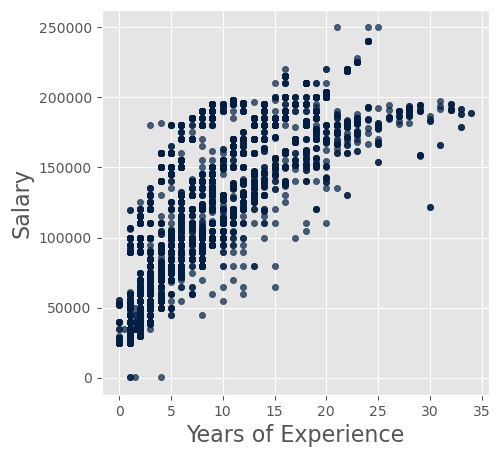

In [4]:
clean_salary.scatter("Years of Experience", "Salary")

Just like that, you've produced your first scatter plot! It looks a little messy, however. Often, scatter plots can suffer from what's known as **[overplotting](https://www.displayr.com/what-is-overplotting/)**: when many data points fall on top of each other, creating a blob of data. When this happens, it's often difficult to see the individual data points.

To fix this, we can focus in on a smaller subset of the data. In this case, we'll look at individuals who have a PhD education level.

<div class="alert alert-warning">
We decide to take only individuals with PhDs as it significantly reduces the size of the data, but something important to note is that whatever trends we find in the scatter plot below might not completely line up with or be true to the trend regarding the general population of the whole dataset.
</div>

<!-- BEGIN QUESTION -->

### Question 1.1
Using clean_salary, create a smaller subset of the data named scatter_phd that contains only individuals with a PhD

In [5]:
# Create a smaller subset of data; only individuals with a PhD
scatter_phd = clean_salary.where("Education Level", "PhD")
scatter_phd

Age,Gender,Education Level,Job Title,Years of Experience,Salary
45,Male,PhD,Senior Manager,15,150000
38,Male,PhD,Senior Scientist,10,110000
39,Male,PhD,Senior Engineer,12,115000
43,Female,PhD,Senior Consultant,15,140000
46,Male,PhD,Senior Manager,20,170000
38,Male,PhD,Senior Scientist,11,120000
43,Male,PhD,Senior Engineer,17,140000
47,Male,PhD,Senior Data Scientist,21,180000
45,Male,PhD,Research Director,16,190000
52,Male,PhD,Chief Technology Officer,24,250000


<!-- BEGIN QUESTION -->

### Question 1.2
Using the `scatter_phd` table, produce a scatter plot that plots `"Years of Experience"` on the x-axis and `"Salary"` on the y-axis. Your code should be very similar to the previous scatter plot.

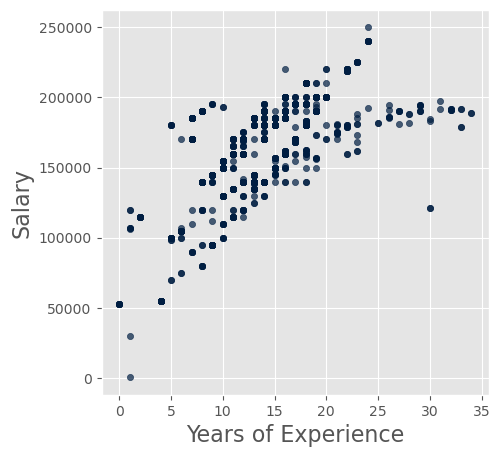

In [11]:
# Replace the ... with the necessary code to plot the scatter plot
scatter_phd.scatter("Years of Experience", "Salary")

<!-- END QUESTION -->

That looks a little better! There is still a cluster of data points in the bottom left corner, but a relationship can be seen between the two variables.

<div class="alert alert-warning">
Analyze your scatter plot above and see if you notice anything interesting. One question to consider is why there are distinct vertical lines of data points, and how this makes sense based on how the <code>"Years of Experience"</code> feature is represented.
</div>

<!-- BEGIN QUESTION -->

### Question 1.3 (Discussion)
What relationship between years of experience and salary (for PhD holders specifically, in this case) does the above scatter plot reveal?

Positive correlation between years of experience and salary.

<!-- END QUESTION -->

### Optional argument: `group`

The `scatter` method also allows you to specify specific a group for each data point using the `group` keyword argument.

Say we wanted to investigate the relationship between an individual's **years of experience** and their **salary** with respect to their reported **gender**.

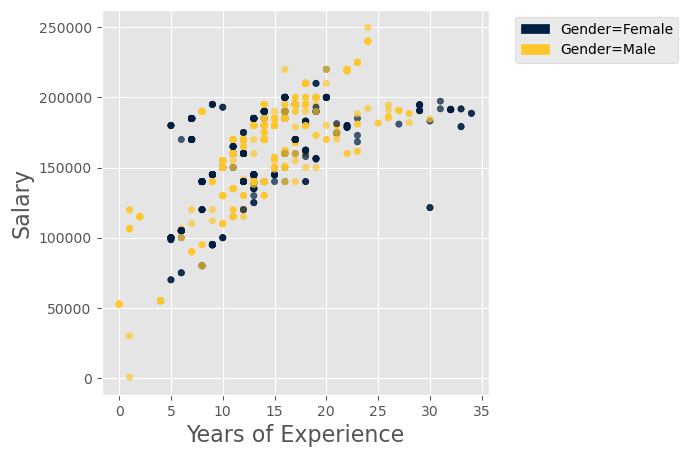

In [16]:
scatter_phd.scatter("Years of Experience", "Salary", group = "Gender")

By utilizing the `group` argument, we see our scatter plot stratified into the different categories our data has for gender. This gives us a better insight into the trends of the relationship between years of experience and salary for each gender, rather than simply looking at all gender categories together.

<!-- BEGIN QUESTION -->

### Question 1.4 (Discussion)
Are there any patterns you can notice from the scatter plot? Gender biases, when one gender is given preferential treatment (promotions, higher salaries, less work, etc.) over another or when there is a prejudice against one gender, can be prevalent within the workplace. Does this scatter plot show any gender biases? What might this look like in a real-world setting?

Among the top earners within each group, they tend to lean male (although not by a significant margin). There seem to be more male PhD holders earlier on in their careers, and the PhD holders that have 30-35 years of experience tend to lean female. There seem to be more male PhD holders than female PhD holders. 

<!-- END QUESTION -->

Scatter plots are useful when visualizing two numerical variables together. If you want to plot two numerical variables but one variable corresponds to time, we can use a line plot to visualize this instead.

---
### **The [plot](http://data8.org/datascience/_autosummary/datascience.tables.Table.plot.html#datascience.tables.Table.plot) method**

Similar to `scatter`, we give `plot` the names of two numerical columns and it creates a **line plot** for us. If we want to draw multiple line plots on the same set of axes, we give it a table with multiple numerical columns, and tell it which one contains the values for the x-axis.

The `plot` method allows us to see how non-time variables change over time. Let's use `plot` to look at the age patterns over the course of years of experience. First, we will look at a single line plot using `plot`:

<!-- BEGIN QUESTION -->

### Question 2.1

Using clean_salary, create a Table named experience_age with two columns: The first column should be Years of Experience, and the second column represents the average age of an individual with that many Years of Exerpience.

In [23]:
experience_age = clean_salary.group("Years of Experience", np.mean).drop("Gender mean", "Education Level mean", "Job Title mean", "Salary mean")
experience_age

Years of Experience,Age mean
0,23.2917
0.5,23
1,25.2111
1.5,27.8333
2,26.5607
3,27.7458
4,28.7069
5,29.6591
6,31.1758
7,31.7131


<!-- BEGIN QUESTION -->

### Question 2.2
Using the `experience_age` table and the `plot` method, produce a *line plot* that plots the average age over years of experience.

*Hint*: You'll want to plot the years of experience on the x-axis and average age on the y-axis.

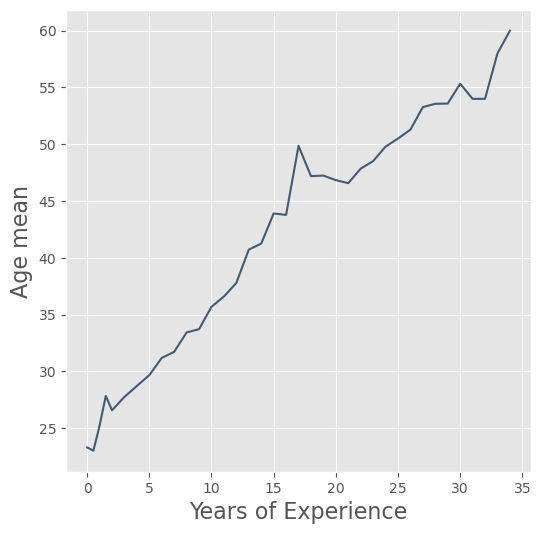

In [24]:
experience_age.plot("Years of Experience", "Age mean")

<!-- END QUESTION -->

### Identifying Temporal Patterns

Line plots are incredibly effective tools for identifying temporal patterns (i.e. changes over time). Let's utilize our newfound knowledge of the `plot` method to uncover underlying temporal patterns within each education level as they get more years of experience. Run the following cell to create tables for each education level and the average salary for each additional year of experience. The subsequent cells will create their respective plots. Analyze the graphs and answer the question that follows.

In [25]:
# Create tables for each education level
hs_salary_avg = clean_salary.where("Education Level", are.equal_to("High School")).group("Years of Experience", np.mean).drop("Gender mean", "Job Title mean", "Education Level mean", "Age mean")
bachelor_salary_avg = clean_salary.where("Education Level", are.equal_to("Bachelor's Degree")).group("Years of Experience", np.mean).drop("Gender mean", "Job Title mean", "Education Level mean", "Age mean")
master_salary_avg = clean_salary.where("Education Level", are.equal_to("Master's Degree")).group("Years of Experience", np.mean).drop("Gender mean", "Job Title mean", "Education Level mean", "Age mean")
phd_salary_avg = clean_salary.where("Education Level", are.equal_to("PhD")).group("Years of Experience", np.mean).drop("Gender mean", "Job Title mean", "Education Level mean", "Age mean")

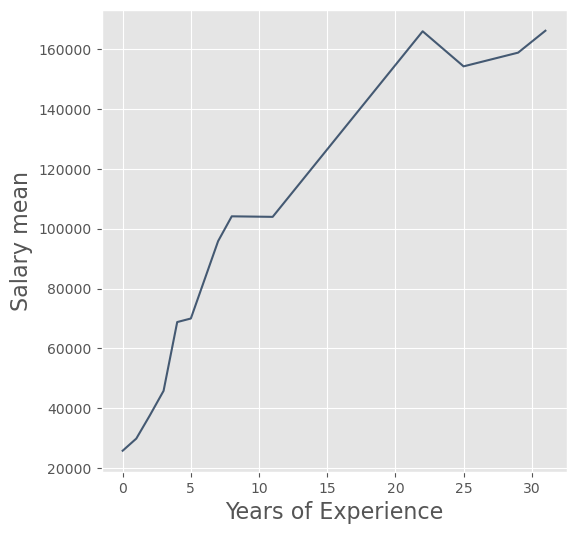

In [26]:
# Run this cell to produce a line plot for the high school education salary average
hs_salary_avg.plot("Years of Experience", "Salary mean")

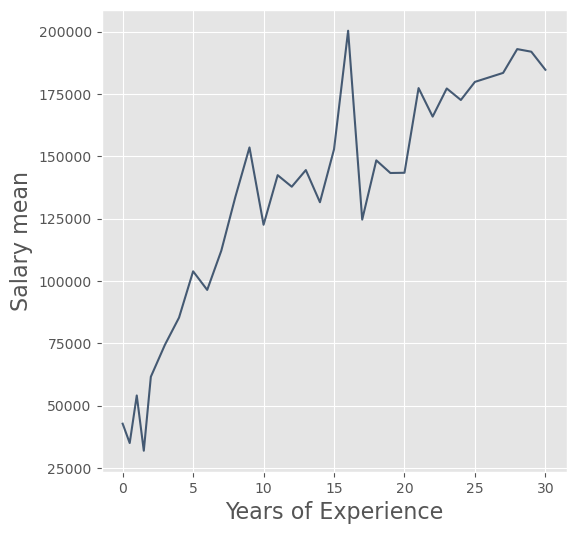

In [50]:
# Run this cell to produce a line plot for the bachelor's degree salary average
bachelor_salary_avg.plot("Years of Experience", "Salary mean")

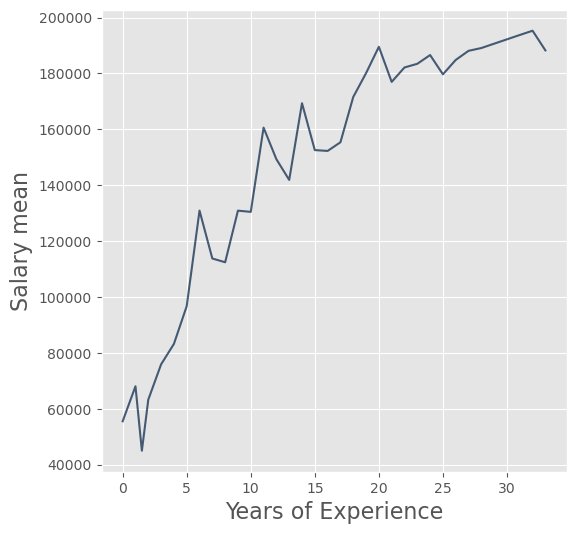

In [51]:
# Run this cell to produce a line plot for the master's degree salary average
master_salary_avg.plot("Years of Experience", "Salary mean")

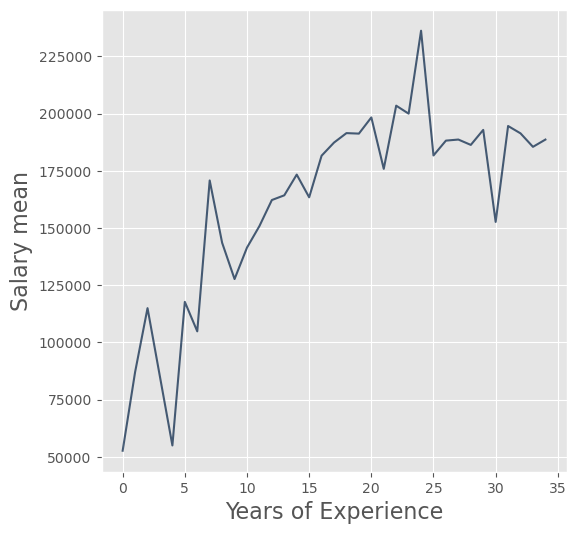

In [52]:
# Run this cell to produce a line plot for the PhD salary average
phd_salary_avg.plot("Years of Experience", "Salary mean")

<!-- BEGIN QUESTION -->

### Question 2.3 (Discussion)
What patterns do you notice when comparing these line plots? Do any of them stand out to you? Do the results you are seeing make sense with respect to your knowlege of education levels? Be sure to pay close attention to the scales of the axes for each plot!

The y-axis lower and upper bound changes depending on the highest level of education.

<!-- END QUESTION -->

### Multiple Variables
If we want to visualize multiple variables on one plot, we can include them all in the table we call `plot` on.

In [36]:
experience_age_salary = clean_salary.group("Years of Experience", np.mean).drop("Gender mean", "Education Level mean", "Job Title mean")
experience_age_salary

Years of Experience,Age mean,Salary mean
0,23.2917,29680.2
0.5,23,35000
1,25.2111,46992.8
1.5,27.8333,36279.2
2,26.5607,58699.5
3,27.7458,72944.4
4,28.7069,83332.1
5,29.6591,103111
6,31.1758,111891
7,31.7131,122171


Since we are trying to compare `"Salary mean"` and `"Age mean"` and their units are different, we have to manipulate the data before plotting. To do this, let's first divide the `"Salary mean"` column by 1000 to get a better sense of the relationship. The cell below does this data manipulation for you.

In [37]:
experience_age_salary = experience_age_salary.with_column('Salary mean', experience_age_salary.column('Salary mean') / 1000)
experience_age_salary

Years of Experience,Age mean,Salary mean
0,23.2917,29.6802
0.5,23,35
1,25.2111,46.9928
1.5,27.8333,36.2792
2,26.5607,58.6995
3,27.7458,72.9444
4,28.7069,83.3321
5,29.6591,103.111
6,31.1758,111.891
7,31.7131,122.171


<!-- BEGIN QUESTION -->

### Question 2.4
Using the `experience_age_salary` table, produce a line plot with *one line per variable* other than `"Years of Experience"`. That is, `"Years of Experience"` should be plotted on the x-axis.

Hint: The first argument still represents the column for the x-axis data. The second argument is an array/list of all the other columns.

Years of Experience,Age mean,Salary mean
0,23.2917,29.6802
0.5,23,35
1,25.2111,46.9928
1.5,27.8333,36.2792
2,26.5607,58.6995
3,27.7458,72.9444
4,28.7069,83.3321
5,29.6591,103.111
6,31.1758,111.891
7,31.7131,122.171


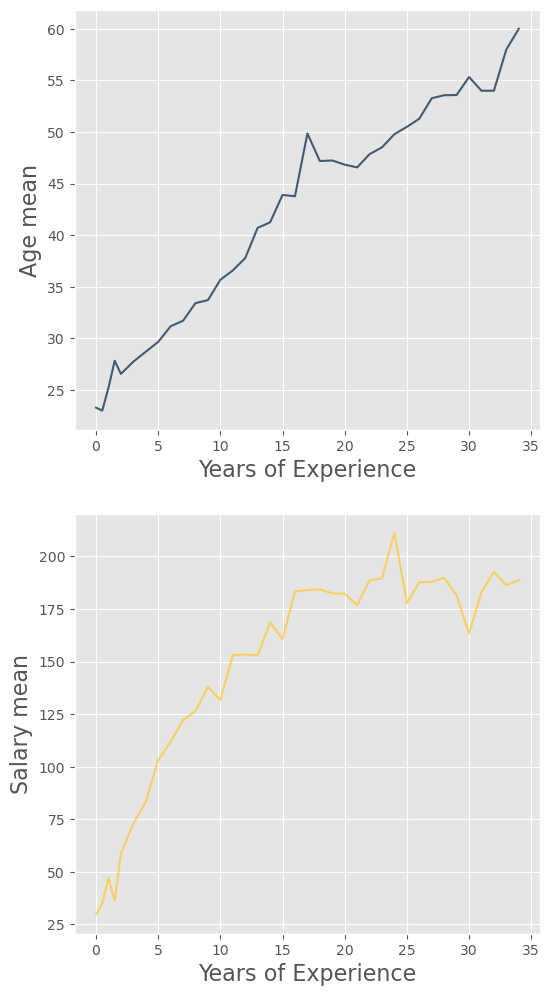

In [44]:
# Replace the ... with the necessary code to plot the scatter plot
experience_age_salary.plot("Years of Experience", ["Age mean", "Salary mean"], overlay=False)
experience_age_salary

---
## Done! 😇

---

## Pets of Data 6
I hope you enjoyed Lab 7!

<img src="kenzo.jpeg" width="40%" alt="Cat"/>

## Submission

For today's lab, please download a PDF of your notebook by going to File --> Save and Export Notebook As --> PDF. Make sure you've run all your cells so all your visualizaitons are showing! Then, go to gradescope and submit the assignment [here](https://www.gradescope.com/courses/845265/assignments/5206273). Please select your pages accordingly!